# DSC 540 Term Project
## Milestone 2: Clean/ Format Flat File
Isabella Sturm

2021-04-22

In [91]:
import pandas as pd

# Load flat file data
df_2015 = pd.read_csv('2015.csv')
print('2015 DATA')
print(df_2015.shape)
print(df_2015.columns)
print(df_2015.head(1))

df_2016 = pd.read_csv('2016.csv')
print('\n2016 DATA')
print(df_2016.shape)
print(df_2016.columns)
print(df_2016.head(1))

df_2017 = pd.read_csv('2017.csv')
print('\n2017 DATA')
print(df_2017.shape)
print(df_2017.columns)
print(df_2017.head(1))

df_2018 = pd.read_csv('2018.csv')
print('\n2018 DATA')
print(df_2018.shape)
print(df_2018.columns)
print(df_2018.head(1))

df_2019 = pd.read_csv('2019.csv')
print('\n2019 DATA')
print(df_2019.shape)
print(df_2019.columns)
print(df_2019.head(1))

2015 DATA
(158, 12)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  

2016 DATA
(157, 13)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trus

In [92]:
# Transform 2: Add Year column for to identify which rows come from each dataset when combined
subset_2015 = df_2015.assign(Year=2015)
subset_2016 = df_2016.assign(Year=2016)
subset_2017 = df_2017.assign(Year=2017)
subset_2018 = df_2018.assign(Year=2018)
subset_2019 = df_2019.assign(Year=2019)

In [93]:
# Transform 3
# Rename columns
subset_2015 = subset_2015.rename(columns={'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 
                   'Trust (Government Corruption)': 'Trust'})
subset_2016 = subset_2016.rename(columns={'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 
                   'Trust (Government Corruption)': 'Trust'})
subset_2017 = subset_2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score',
                   'Economy..GDP.per.Capita.': 'Economy','Health..Life.Expectancy.': 'Health',
                   'Trust..Government.Corruption.': 'Trust'})
subset_2018 = subset_2018.rename(columns={'Country or region': 'Country', 'Overall rank': 'Happiness Rank', 
                   'Score': 'Happiness Score', 'GDP per capita': 'Economy',
                   'Healthy life expectancy': 'Health', 'Freedom to make life choices': 'Freedom',
                   'Perceptions of corruption': 'Trust'})
subset_2019 = subset_2019.rename(columns={'Country or region': 'Country', 'Overall rank': 'Happiness Rank', 
                   'Score': 'Happiness Score', 'GDP per capita': 'Economy',
                   'Healthy life expectancy': 'Health', 'Freedom to make life choices': 'Freedom',
                   'Perceptions of corruption': 'Trust'})


In [94]:
# Transform 4
# Combine data into one dataframe
# Common columns: Country, Happiness Rank, Score, GDP per capita, Life Expectancy, Generosity, 
#                 Trust/Perceptions of Corruptions, Freedom Generosity
# Others: Family, Social Support, Dystopia Residual
dataframes = [subset_2015, subset_2016, subset_2017, subset_2018, subset_2019]
happiness_df = pd.concat(dataframes)
happiness_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Dystopia.Residual,Social support
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,NaN,NaN


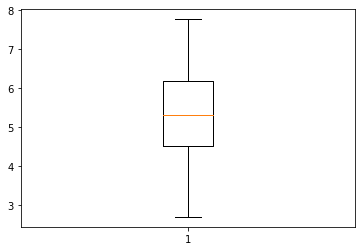

In [95]:
# Transform 5: Identify Outliers
import matplotlib.pyplot as plt

plt.boxplot(x='Happiness Score', data=happiness_df)
plt.show()

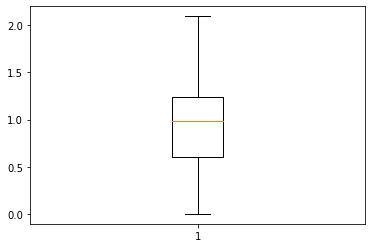

In [96]:
plt.boxplot(x='Economy', data=happiness_df)
plt.show()

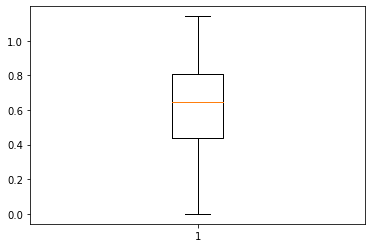

In [97]:
 plt.boxplot(x='Health', data=happiness_df)
plt.show()

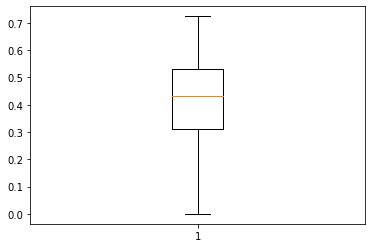

In [98]:
plt.boxplot(x='Freedom', data=happiness_df)
plt.show()

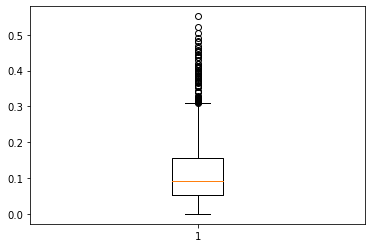

In [99]:
plt.boxplot(x=happiness_df['Trust'].dropna())
plt.show()

In [100]:
happiness_df[happiness_df['Trust'] > 0.3]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Dystopia.Residual,Social support
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,NaN,NaN
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,Canada,NaN,9,7.278,NaN,1.36500,NaN,1.03900,0.58400,0.30800,0.28500,NaN,2019,NaN,NaN,NaN,NaN,NaN,1.505
13,Luxembourg,NaN,14,7.090,NaN,1.60900,NaN,1.01200,0.52600,0.31600,0.19400,NaN,2019,NaN,NaN,NaN,NaN,NaN,1.479
15,Ireland,NaN,16,7.021,NaN,1.49900,NaN,0.99900,0.51600,0.31000,0.29800,NaN,2019,NaN,NaN,NaN,NaN,NaN,1.553
33,Singapore,NaN,34,6.262,NaN,1.57200,NaN,1.14100,0.55600,0.45300,0.27100,NaN,2019,NaN,NaN,NaN,NaN,NaN,1.463


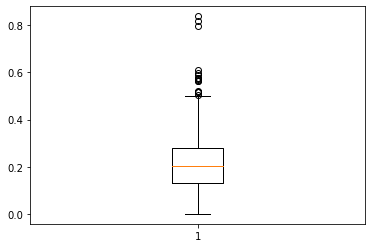

In [101]:
plt.boxplot(x=happiness_df['Generosity'].dropna())
plt.show()

In [102]:
happiness_df[happiness_df['Generosity'] > 0.5]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Dystopia.Residual,Social support
20,United Kingdom,Western Europe,21,6.867,0.01866,1.266370,1.285480,0.909430,0.596250,0.320670,0.519120,1.96994,2015,NaN,NaN,NaN,NaN,NaN,NaN
33,Thailand,Southeastern Asia,34,6.455,0.03557,0.966900,1.265040,0.738500,0.556640,0.031870,0.576300,2.31945,2015,NaN,NaN,NaN,NaN,NaN,NaN
36,Malta,Western Europe,37,6.302,0.04206,1.207400,1.302030,0.887210,0.603650,0.135860,0.517520,1.64880,2015,NaN,NaN,NaN,NaN,NaN,NaN
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.828270,1.087080,0.637930,0.466110,0.000000,0.515350,1.86399,2015,NaN,NaN,NaN,NaN,NaN,NaN
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.188470,0.951520,0.438730,0.465820,0.399280,0.503180,2.11032,2015,NaN,NaN,NaN,NaN,NaN,NaN
128,Myanmar,Southeastern Asia,129,4.307,0.04351,0.271080,0.709050,0.482460,0.440170,0.190340,0.795880,1.41805,2015,NaN,NaN,NaN,NaN,NaN,NaN
22,United Kingdom,Western Europe,23,6.725,NaN,1.402830,1.086720,0.809910,0.500360,0.273990,0.501560,2.14999,2016,6.647,6.803,NaN,NaN,NaN,NaN
29,Malta,Western Europe,30,6.488,NaN,1.307820,1.098790,0.803150,0.549940,0.175540,0.562370,1.99032,2016,6.409,6.567,NaN,NaN,NaN,NaN
32,Thailand,Southeastern Asia,33,6.474,NaN,1.089300,1.044770,0.649150,0.495530,0.028330,0.586960,2.57960,2016,6.396,6.552,NaN,NaN,NaN,NaN
78,Indonesia,Southeastern Asia,79,5.314,NaN,0.951040,0.876250,0.493740,0.392370,0.003220,0.565210,2.03171,2016,5.237,5.391,NaN,NaN,NaN,NaN


In [103]:
# Note: Only columns with outliers are Trust and Generosity

## Milestone 3: Clean/Format Website Data
Isabella Sturm

2021-05-07

In [104]:
import pandas as pd
import urllib
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [105]:
# Read in page (https://en.wikipedia.org/wiki/World_Happiness_Report#International_rankings)
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/World_Happiness_Report#International_rankings')
html = response.read()
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all('table')
print("Number of tables: ", len(tables))

Number of tables:  20


In [106]:
whr_tables = soup.find_all('table', {'class': 'wikitable sortable'})
print("Number of World Happiness Report tables: ", len(whr_tables))

Number of World Happiness Report tables:  5


In [107]:
# Get 2019 data
rows_2019 = whr_tables[0].find_all('tr')
data_2019 = rows_2019[1:]
headers_2019 = rows_2019[0]
df_2019_headers = [th.getText().replace("\n","") for th in headers_2019.find_all('th')]
df_2019_data = [[td.getText() for td in tr.find_all('td')] for tr in data_2019]
df_2019_web = pd.DataFrame(df_2019_data, columns=df_2019_headers)
print(df_2019_web.head(),"\n-----------------------------------------")

# Get 2018 data
rows_2018 = whr_tables[0].find_all('tr')
data_2018 = rows_2018[1:]
headers_2018 = rows_2018[0]
df_2018_headers = [th.getText().replace("\n","") for th in headers_2018.find_all('th')]
df_2018_data = [[td.getText() for td in tr.find_all('td')] for tr in data_2018]
df_2018_web = pd.DataFrame(df_2018_data, columns=df_2018_headers)
print(df_2018_web.head(),"\n-----------------------------------------")

# Get 2017 data
rows_2017 = whr_tables[0].find_all('tr')
data_2017 = rows_2017[1:]
headers_2017 = rows_2017[0]
df_2017_headers = [th.getText().replace("\n","") for th in headers_2017.find_all('th')]
df_2017_data = [[td.getText() for td in tr.find_all('td')] for tr in data_2017]
df_2017_web = pd.DataFrame(df_2017_data, columns=df_2017_headers)
print(df_2017_web.head(),"\n-----------------------------------------")

# Get 2016 data
rows_2016 = whr_tables[0].find_all('tr')
data_2016 = rows_2016[1:]
headers_2016 = rows_2016[0]
df_2016_headers = [th.getText().replace("\n","") for th in headers_2016.find_all('th')]
df_2016_data = [[td.getText() for td in tr.find_all('td')] for tr in data_2016]
df_2016_web = pd.DataFrame(df_2016_data, columns=df_2016_headers)
print(df_2016_web.head(),"\n-----------------------------------------")

  Overall rank Country or region  Score GDP per capita Social support  \
0            1           Finland  7.809          1.285          1.500   
1            2           Denmark  7.646          1.327          1.503   
2            3       Switzerland  7.560          1.391          1.472   
3            4           Iceland  7.504          1.327          1.548   
4            5            Norway  7.488          1.424          1.495   

  Healthy life expectancy Freedom to make life choices Generosity  \
0                   0.961                        0.662      0.160   
1                   0.979                        0.665      0.243   
2                   1.041                        0.629      0.269   
3                   1.001                        0.662      0.362   
4                   1.008                        0.670      0.288   

  Perceptions of corruption  
0                   0.478\n  
1                   0.495\n  
2                   0.408\n  
3                   0.145\

In [108]:
print(df_2019_web.columns)
print(df_2018_web.columns)
print(df_2017_web.columns)
print(df_2016_web.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [109]:
# Transform 1: Add new column for year
df_2019_web = df_2019_web.assign(Year=2019)
df_2018_web = df_2018_web.assign(Year=2018)
df_2017_web = df_2017_web.assign(Year=2017)
df_2016_web = df_2016_web.assign(Year=2016)


In [110]:
# Transform 2: Combine datasets
dataframes = [df_2019_web, df_2018_web, df_2017_web, df_2016_web]
df_web = pd.concat(dataframes)
df_web.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478\n,2019
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495\n,2019
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408\n,2019
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145\n,2019
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434\n,2019


In [111]:
# Transform 3: Remove new line (\n) at the end of values in dataframe
for col in df_web.columns:
    df_web[col] = df_web[col].apply(lambda x: str(x).replace("\n", ""))
    
    # Set numeric columns back to int/float from string
    if col in ["Overall Rank", "Year"]:
        df_web[col] = df_web[col].apply(lambda x: int(x))
    elif col in ["Score", "GDP per capita", "Social support", "Healthy life expectancy",
                    "Freedom to make life choices", "Generosity", "Perceptions of corruption"]:
        df_web[col] = df_web[col].apply(lambda x: float(x))

df_web.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,2019
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,2019
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,2019
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,2019
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,2019


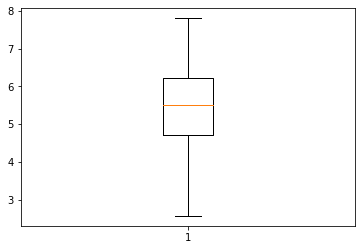

In [112]:
# Transform 4: Check for outliers
plt.boxplot(x=df_web['Score'])
plt.show()

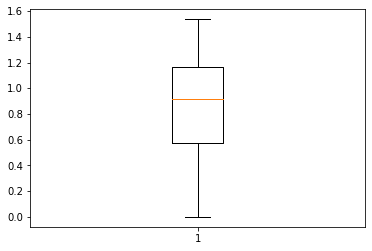

In [113]:
plt.boxplot(x=df_web['GDP per capita'])
plt.show()

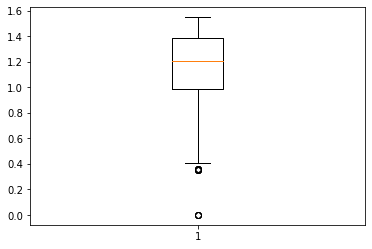

In [114]:
plt.boxplot(x=df_web['Social support'])
plt.show()

In [115]:
print("Outliers: ", df_web[df_web['Social support'] < 0.4])

Outliers:      Overall rank          Country or region  Score  GDP per capita  \
85            86                      Benin  5.216           0.366   
148          149   Central African Republic  3.476           0.041   
152          153                Afghanistan  2.567           0.301   
85            86                      Benin  5.216           0.366   
148          149   Central African Republic  3.476           0.041   
152          153                Afghanistan  2.567           0.301   
85            86                      Benin  5.216           0.366   
148          149   Central African Republic  3.476           0.041   
152          153                Afghanistan  2.567           0.301   
85            86                      Benin  5.216           0.366   
148          149   Central African Republic  3.476           0.041   
152          153                Afghanistan  2.567           0.301   

     Social support  Healthy life expectancy  Freedom to make life choices  \


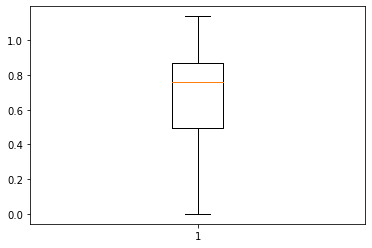

In [116]:
plt.boxplot(x=df_web['Healthy life expectancy'])
plt.show()

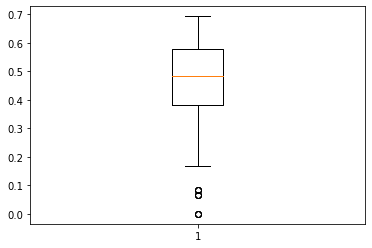

In [117]:
plt.boxplot(x=df_web['Freedom to make life choices'])
plt.show()

In [118]:
print("Outliers: ", df_web[df_web['Freedom to make life choices'] < 0.15])

Outliers:      Overall rank Country or region  Score  GDP per capita  Social support  \
99           100           Algeria  5.005           0.944           1.143   
151          152       South Sudan  2.817           0.289           0.553   
152          153       Afghanistan  2.567           0.301           0.356   
99           100           Algeria  5.005           0.944           1.143   
151          152       South Sudan  2.817           0.289           0.553   
152          153       Afghanistan  2.567           0.301           0.356   
99           100           Algeria  5.005           0.944           1.143   
151          152       South Sudan  2.817           0.289           0.553   
152          153       Afghanistan  2.567           0.301           0.356   
99           100           Algeria  5.005           0.944           1.143   
151          152       South Sudan  2.817           0.289           0.553   
152          153       Afghanistan  2.567           0.301        

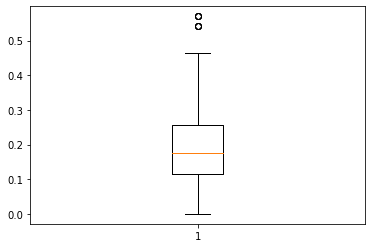

In [119]:
plt.boxplot(x=df_web['Generosity'])
plt.show()

In [120]:
print("Outliers: ", df_web[df_web['Generosity'] > 0.5])

Outliers:      Overall rank Country or region  Score  GDP per capita  Social support  \
83            84         Indonesia  5.286           0.892           1.155   
132          133           Myanmar  4.308           0.678           1.098   
83            84         Indonesia  5.286           0.892           1.155   
132          133           Myanmar  4.308           0.678           1.098   
83            84         Indonesia  5.286           0.892           1.155   
132          133           Myanmar  4.308           0.678           1.098   
83            84         Indonesia  5.286           0.892           1.155   
132          133           Myanmar  4.308           0.678           1.098   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
83                     0.610                         0.568       0.543   
132                    0.495                         0.597       0.570   
83                     0.610                         0.568       0.543   

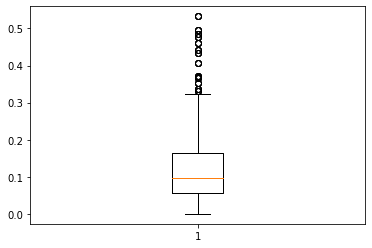

In [121]:
plt.boxplot(x=df_web['Perceptions of corruption'])
plt.show()

In [122]:
print("Outliers: ", df_web[df_web['Perceptions of corruption'] > 0.32])

Outliers:      Overall rank Country or region  Score  GDP per capita  Social support  \
0              1           Finland  7.809           1.285           1.500   
1              2           Denmark  7.646           1.327           1.503   
2              3       Switzerland  7.560           1.391           1.472   
4              5            Norway  7.488           1.424           1.495   
5              6       Netherlands  7.449           1.339           1.464   
6              7            Sweden  7.353           1.322           1.433   
7              8       New Zealand  7.300           1.242           1.487   
9             10        Luxembourg  7.238           1.537           1.388   
10            11            Canada  7.232           1.302           1.435   
11            12         Australia  7.223           1.310           1.477   
12            13    United Kingdom  7.165           1.273           1.458   
15            16           Ireland  7.094           1.447        

## Milestone 4: Clean/Format API Data
2021-05-18

In [123]:
# Load packages
import requests
import xml.etree.ElementTree as et
import pandas as pd
import io

In [124]:
# Connect to the api to get all the countries and ISO codes
country_api = 'http://api.worldbank.org/v2/country?per_page=300'
country_response = requests.get(country_api)

# Parse the xml - root is <countries>
root = et.fromstring(country_response.content)

# Get the country code and country name for each country
countries = []
for country in root:
    countries.append([country.attrib.get('id'), country[1].text])
    #print(country.attrib.get('id'))
    #print(country[1].text)
countries
    
#countries_dict = {}
#for country in root:
#    children = country.getchildren()
#    countries_dict[children[0].text] = children[1].text
#print(countries_dict)

[['ABW', 'Aruba'],
 ['AFG', 'Afghanistan'],
 ['AFR', 'Africa'],
 ['AGO', 'Angola'],
 ['ALB', 'Albania'],
 ['AND', 'Andorra'],
 ['ARB', 'Arab World'],
 ['ARE', 'United Arab Emirates'],
 ['ARG', 'Argentina'],
 ['ARM', 'Armenia'],
 ['ASM', 'American Samoa'],
 ['ATG', 'Antigua and Barbuda'],
 ['AUS', 'Australia'],
 ['AUT', 'Austria'],
 ['AZE', 'Azerbaijan'],
 ['BDI', 'Burundi'],
 ['BEA', 'East Asia & Pacific (IBRD-only countries)'],
 ['BEC', 'Europe & Central Asia (IBRD-only countries)'],
 ['BEL', 'Belgium'],
 ['BEN', 'Benin'],
 ['BFA', 'Burkina Faso'],
 ['BGD', 'Bangladesh'],
 ['BGR', 'Bulgaria'],
 ['BHI', 'IBRD countries classified as high income'],
 ['BHR', 'Bahrain'],
 ['BHS', 'Bahamas, The'],
 ['BIH', 'Bosnia and Herzegovina'],
 ['BLA', 'Latin America & the Caribbean (IBRD-only countries)'],
 ['BLR', 'Belarus'],
 ['BLZ', 'Belize'],
 ['BMN', 'Middle East & North Africa (IBRD-only countries)'],
 ['BMU', 'Bermuda'],
 ['BOL', 'Bolivia'],
 ['BRA', 'Brazil'],
 ['BRB', 'Barbados'],
 ['BRN', 

In [125]:
# Connect to the api /v1/country/type/var/start/end/ISO3[.ext]
api_url = 'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/'
api_pr_1 = 'annualavg/pr/1980/1999/'
api_pr_2 = 'annualavg/pr/2020/2039/'
api_tas_1 = 'annualavg/tas/1980/1999/'
api_tas_2 = 'annualavg/tas/2020/2039/'

# requires:
# - type: mavg (monthly avg), annualavg, manom (avg montly change), annualanom
# - var: pr (Precipiation in mm), tas (temperature in Celcius)
# - start & end
# - ISO3, country code
# - ext (optional)

In [126]:
# Get all the temperature and precipatation data for all the countries
climate_df = pd.DataFrame() # create an empty for what will be the complete dataframe
for country in countries:
    for api_ext in [api_pr_1, api_pr_2, api_tas_1, api_tas_2]:
        #print(api_ext, country)
        response = requests.get(api_url+api_ext+country[0]+'.csv')
        if response.status_code != 200 :
            print("Could not pull data for ", country[1], api_ext)
        else:
            data = response.content
            df = pd.read_csv(io.StringIO(data.decode('utf-8')))
            df = df.assign(Country=country[1])
            climate_df = climate_df.append(df, ignore_index=True)
        
climate_df.head()

,GCM,var,from_year,to_year,annual,Country,scenario,Invalid country code. Three letters are required
0,bccr_bcm2_0,pr,1980.0,1999.0,1065.116577,Aruba,NaN,NaN
1,cccma_cgcm3_1,pr,1980.0,1999.0,630.975098,Aruba,NaN,NaN
2,cnrm_cm3,pr,1980.0,1999.0,1108.347900,Aruba,NaN,NaN
3,csiro_mk3_5,pr,1980.0,1999.0,12.065170,Aruba,NaN,NaN
4,gfdl_cm2_0,pr,1980.0,1999.0,231.364182,Aruba,NaN,NaN


In [127]:
# Remove the last column "Invald country code..."
climate_df = climate_df[['GCM', 'var', 'from_year', 'to_year', 'annual', 'Country']]
climate_df


,GCM,var,from_year,to_year,annual,Country
0,bccr_bcm2_0,pr,1980.0,1999.0,1065.116577,Aruba
1,cccma_cgcm3_1,pr,1980.0,1999.0,630.975098,Aruba
2,cnrm_cm3,pr,1980.0,1999.0,1108.347900,Aruba
3,csiro_mk3_5,pr,1980.0,1999.0,12.065170,Aruba
4,gfdl_cm2_0,pr,1980.0,1999.0,231.364182,Aruba
...,...,...,...,...,...,...
18227,mri_cgcm2_3_2a,tas,2020.0,2039.0,22.783199,Zimbabwe
18228,mri_cgcm2_3_2a,tas,2020.0,2039.0,22.580944,Zimbabwe
18229,ukmo_hadcm3,tas,2020.0,2039.0,23.868597,Zimbabwe
18230,ukmo_hadcm3,tas,2020.0,2039.0,23.566982,Zimbabwe


## Milestone 5
Isabella Sturm

2021-06-01

In [128]:
# Load packages
import sqlite3
import matplotlib.pyplot as plt

In [129]:
# Create connection to database
conn = sqlite3.connect('worldhappinessdb')

In [130]:
# Create table for csv data (happiness_df)
happiness_df.to_sql('tWorldHappinessCSV', conn, if_exists='replace')
cursor = conn.cursor()
cursor.execute('SELECT * FROM tWorldHappinessCSV LIMIT(1)').fetchone()

/Users/isabellasturm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2653: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


(0,
 'Switzerland',
 'Western Europe',
 1,
 7.587000000000001,
 0.03411,
 1.3965100000000001,
 1.34951,
 0.9414299999999999,
 0.66557,
 0.41978000000000004,
 0.29678000000000004,
 2.5173799999999997,
 2015,
 None,
 None,
 None,
 None,
 None,
 None)

In [131]:
# Create table for web data (df_web)
df_web.to_sql('tWorldHappinessWeb', conn, if_exists='replace')
cursor.execute('SELECT * FROM tWorldHappinessWeb LIMIT(1)').fetchone()

(0, '1', '\xa0Finland', 7.809, 1.285, 1.5, 0.961, 0.662, 0.16, 0.478, 2019)

In [132]:
# Create table for API data (climate_df)
climate_df.to_sql('tClimate', conn, if_exists='replace')
cursor.execute('SELECT * FROM tClimate LIMIT(1)').fetchone()

(0, 'bccr_bcm2_0', 'pr', 1980.0, 1999.0, 1065.11657715, 'Aruba')

In [133]:
# Combine the tables into one table
sql_query = """SELECT t1.Country, t1.Region, IFNULL(t1.[Happiness Rank], t2.[Overall rank]) as Rank,
    IFNULL(t1.[Happiness Score], t2.[Score]) as Score, Economy, Family,
    IFNULL(t1.[Health], t2.[Healthy life expectancy]) as Health, 
    IFNULL(t1.[Freedom], t2.[Freedom to make life choices]) as Freedom, 
    IFNULL(t1.[Generosity], t2.[Generosity]) as Generosity,
    IFNULL(t1.[Social support], t2.[Social Support]) as SocialSupport,
    IFNULL(t1.Trust, t2.[Perceptions of corruption])as Trust,
    t2.[GDP per Capita] as GDP, t1.Year
    FROM tWorldHappinessCSV t1 
    LEFT JOIN tWorldHappinessWeb t2 ON t1.Country = t2.[Country or Region]
        AND t1.Year = t2.Year"""
combined_happiness = pd.read_sql_query(sql_query, conn)
#combined_happiness.head()

combined_happiness.to_sql('tWorldHappiness', conn, if_exists='replace')
cursor.execute('SELECT * FROM tWorldHappiness LIMIT(1)').fetchone()


(0,
 'Switzerland',
 'Western Europe',
 1,
 7.587000000000001,
 1.3965100000000001,
 1.34951,
 0.9414299999999999,
 0.66557,
 0.29678000000000004,
 None,
 0.41978000000000004,
 None,
 2015)

In [134]:
# Combine the happiness and climate data
sql_query = """SELECT t1.*,
    t2.from_year, t2.to_year, t2.var, AVG(Annual) as AvgAnnual
    FROM tWorldHappiness t1
    JOIN tClimate t2 ON t1.Country = t2.Country
    GROUP BY t2.Country, t2.var, t2.from_year, t2.to_year"""
happiness_climate_df = pd.read_sql_query(sql_query, conn)
# happiness_climate_df.head()

happiness_climate_df.to_sql('tHappinessClimate', conn, if_exists='replace')
cursor.execute('SELECT * FROM tHappinessClimate LIMIT(1)').fetchone()

(0,
 152,
 'Afghanistan',
 'Southern Asia',
 153,
 3.575,
 0.31982,
 0.30285,
 0.30335,
 0.23414000000000001,
 0.3651,
 None,
 0.09719,
 None,
 2015,
 1980.0,
 1999.0,
 'pr',
 353.90057806224104)

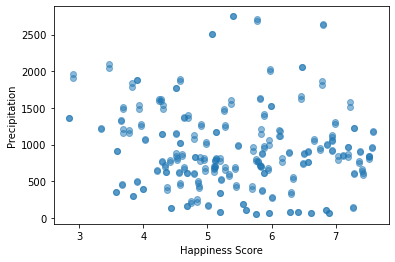

In [135]:
# Create visualizations
# Plot score vs precipations and score vs temperature
precipitation_df = happiness_climate_df[happiness_climate_df['var'] == 'pr']

fig, axes = plt.subplots()
axes.scatter(x=precipitation_df['Score'], 
             y=precipitation_df['AvgAnnual'], 
             alpha=0.5)
plt.xlabel('Happiness Score')
plt.ylabel('Precipitation')
plt.show()

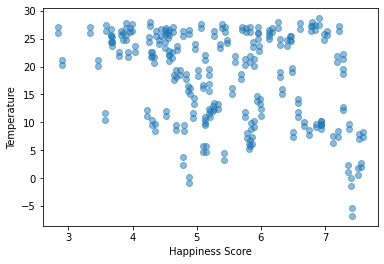

In [136]:
temperature_df = happiness_climate_df[happiness_climate_df['var'] == 'tas']

fig, axes = plt.subplots()

axes.scatter(x=temperature_df['Score'],
             y=temperature_df['AvgAnnual'],
             alpha=0.5)
plt.xlabel('Happiness Score')
plt.ylabel('Temperature')
plt.show()

In [149]:
# Calculate family score for 2019 based on other values
def calculate_family(row):
    # family = score - (econom + health + freedom + generosity + socialsupport + trust)
    return row['Score'] - (row['Economy'] + row['Health'] + row['Freedom'] + row['Generosity'] + row['SocialSupport'] + row['Trust'])

In [152]:
# 2019 data - view the top 10 countries and the factors that make up their scores
happiness_2019_df = combined_happiness[combined_happiness['Year'] == 2019]
happiness_2019_df['Family'] = happiness_2019_df.apply(lambda x: calculate_family(x), axis=1)
top10_df = happiness_2019_df[happiness_2019_df['Rank'].isin([1,2,3,4,5,6,7,8,9,10])]
top10_df

<ipython-input-152-ea3527528584>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness_2019_df['Family'] = happiness_2019_df.apply(lambda x: calculate_family(x), axis=1)


,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Generosity,SocialSupport,Trust,GDP,Year
626,Finland,None,1,7.769,1.340,2.714,0.986,0.596,0.153,1.587,0.393,None,2019
627,Denmark,None,2,7.600,1.383,2.394,0.996,0.592,0.252,1.573,0.410,None,2019
628,Norway,None,3,7.554,1.488,2.241,1.028,0.603,0.271,1.582,0.341,None,2019
629,Iceland,None,4,7.494,1.380,2.401,1.026,0.591,0.354,1.624,0.118,None,2019
630,Netherlands,None,5,7.488,1.396,2.394,0.999,0.557,0.322,1.522,0.298,None,2019
631,Switzerland,None,6,7.480,1.452,2.272,1.052,0.572,0.263,1.526,0.343,None,2019
632,Sweden,None,7,7.343,1.387,2.246,1.009,0.574,0.267,1.487,0.373,None,2019
633,New Zealand,None,8,7.307,1.303,2.126,1.026,0.585,0.330,1.557,0.380,None,2019
634,Canada,None,9,7.278,1.365,2.192,1.039,0.584,0.285,1.505,0.308,None,2019
635,Austria,None,10,7.246,1.376,2.377,1.016,0.532,0.244,1.475,0.226,None,2019


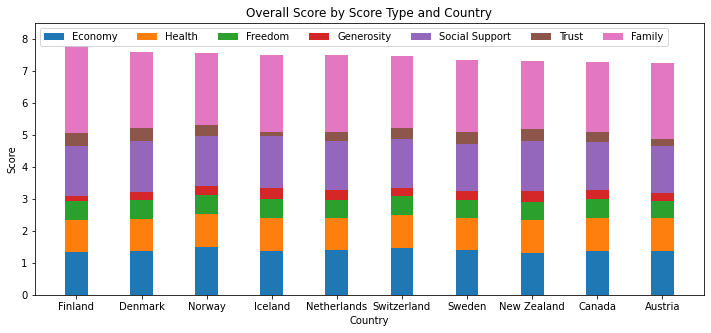

In [197]:
# Create stacked barchart showing the scores that make up the 
# total happiness score for the top 10 "happiest" countries of 2019
labels = top10_df['Country']
economy_scores = top10_df['Economy']
family_scores = top10_df['Family']
health_scores = top10_df['Health']
freedom_scores = top10_df['Freedom']
generosity_scores = top10_df['Generosity']
socsupport_scores = top10_df['SocialSupport']
trust_scores = top10_df['Trust']
width = 0.35
#print(economy_scores,health_scores,freedom_scores,generosity_scores)

fig, axes = plt.subplots()
plt.rcParams['figure.figsize'] = (13,5)
axes.bar(labels, economy_scores, width, label='Economy')
axes.bar(labels, health_scores, width, label='Health',
        bottom=economy_scores)
axes.bar(labels, freedom_scores, width, label='Freedom',
        bottom=(health_scores+economy_scores))
axes.bar(labels, generosity_scores, width, label='Generosity',
        bottom=(health_scores+freedom_scores+economy_scores))
axes.bar(labels, socsupport_scores, width, label='Social Support',
        bottom=(generosity_scores+health_scores+freedom_scores+economy_scores))
axes.bar(labels, trust_scores, width, label='Trust',
        bottom=(socsupport_scores+generosity_scores+health_scores+freedom_scores+economy_scores))
axes.bar(labels, family_scores, width, label='Family',
        bottom=(trust_scores+socsupport_scores+generosity_scores+health_scores+freedom_scores+economy_scores))


axes.set_ylabel('Score')
axes.set_xlabel('Country')
axes.set_title('Overall Score by Score Type and Country')
axes.legend(loc='upper left', ncol=7)
plt.ylim((0.0, 8.5))

plt.show()

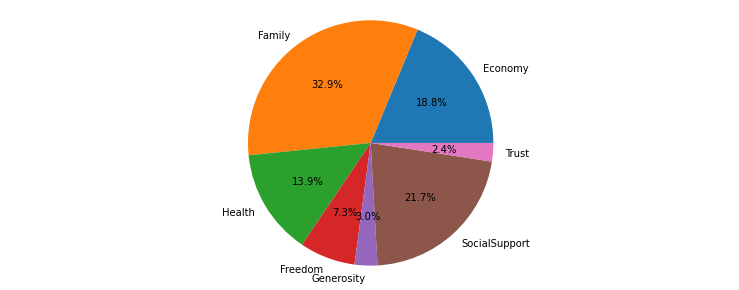

In [202]:
# Average the scores of the top 50 countries to see how they
# make up the total score
top50 = happiness_2019_df[happiness_2019_df['Rank'].isin(range(1,51))]
#top50

labels = ['Economy','Family','Health','Freedom','Generosity','SocialSupport','Trust']
sizes=[top50['Economy'].mean()/top50['Score'].mean(),
       top50['Family'].mean()/top50['Score'].mean(),
       top50['Health'].mean()/top50['Score'].mean(),
       top50['Freedom'].mean()/top50['Score'].mean(),
       top50['Generosity'].mean()/top50['Score'].mean(),
       top50['SocialSupport'].mean()/top50['Score'].mean(),
       top50['Trust'].mean()/top50['Score'].mean()
      ]
fig, axes = plt.subplots()
axes.pie(sizes,labels=labels,autopct='%1.1f%%')
axes.axis('equal')

plt.show()

## Conclusion
I learned a lot of valuable skills while working on this project. Prior to this class I was familiar with the term webscraping and I had done very little work with APIs in the past for undergrad work, but I never fully understood either of these things.

This class pushed me to learn how to use "random" APIs by reading the provided documention (no matter how good or bad) and figure out the proper calls to make to pull the data I need.

I was also able to use my web development knowledge to learn how to scrape the web for data that can be used in data analysis, which I think is a super cool opportunity we have as data scientists.

Lastly, I learned more about joining datasets in Python, filtering and cleaning data and got more practice in creating visualizations of the data.